In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

### Problem Statement:

Use QR decomposition to find the best-fit parameters $m$, ie:

$$ A = QR $$

where Q is an orthogonal ($Q^T Q = I$) matrix and $R$ is an upper triangular matrix. 

### Strategy:

The solution I found given a constant noise matrix in my written solutions was:

$$ m = R^{-1} Q^T d $$

So, it should be simple enough use an `np.linalg` function to return $A$'s QR decomposition and then return $m$, the best fit parameters.

In general consider the noise matrix:

$$ m = \frac{Q^T N^{-1}}{(Q^T N^{-1} Q R)^{-1}}$$

First, define my reqular polynomial fitting, using linear algebra in our usual way

In [35]:
def reg_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    m = np.linalg.inv(a.T@a)@a.T@data
    return m

Next, define a QR decomposition fit, using the `numpy` library's handy `np.linalg.qr` to perform the QR decomposition

In [36]:
def qr_polyfit(x,data,order):
    n = len(x)
    a = np.zeros([n,order+1])
    a[:,0] = 1
    
    for i in range(order):
        a[:,i+1] = x*a[:,i]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

Try a simple fifth order polynomial fit on some random polynomial with both the regular and QR decomposition

In [46]:
n = 1000
order=5
x = np.linspace(-1,1,n)
y = x**5 + 3*x**2 + 0.38472*x + 803.3
data = y + np.random.randn(n)*1
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

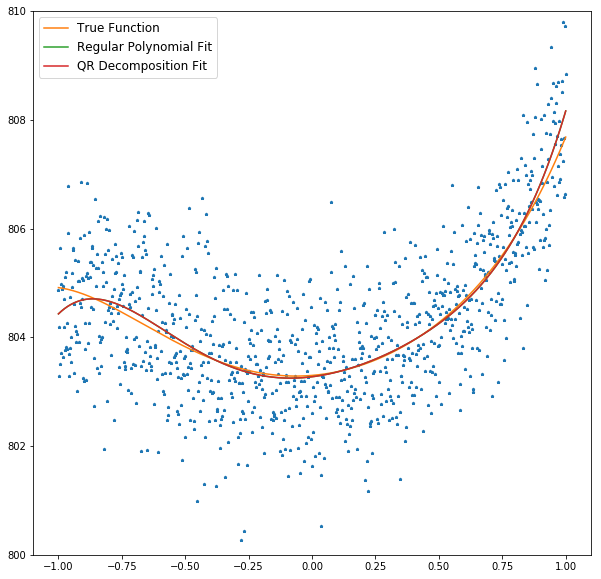

In [50]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit')
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')
plt.show()

As expected, they perform remarkably similar. So similarly, in fact, that the two curves overlap one another - given the plot you'll have to just take my word for it! Now let's try to break the regular fit by doing a higher order polynomial, and see of QR decomposition is up to the task with a lower condition number.

In [53]:
order = 25
y = x**15 + 8*x**10 + 3*x**5 + 3*x**2 + 0.38472*x + 803.3
m_reg = reg_polyfit(x,data,order)
m_qr = qr_polyfit(x,data,order)
fit_reg = np.zeros(n)
fit_qr = np.zeros(n)

for i in range(order+1):
    fit_reg += m_reg[i]*x**i
    fit_qr += m_qr[i]*x**i

Now take a look at the fits

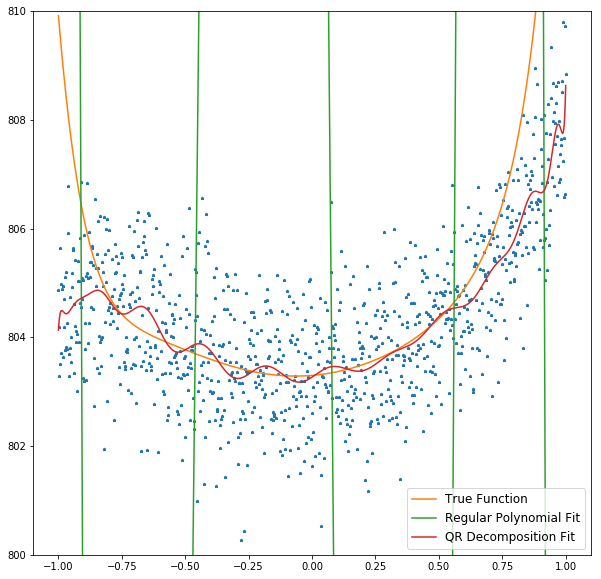

In [54]:
plt.figure(figsize=(10,10))
plt.plot(x,data,'*',markersize=3)
plt.plot(x,y,label='True Function')
plt.plot(x,fit_reg,label='Regular Polynomial Fit')
plt.plot(x,fit_qr,label='QR Decomposition Fit')
plt.xlim(-1.1,1.1)
plt.ylim(800,810)
plt.legend(fontsize='large')

The QR decomposition fit does a far better job of predicting the true function's value compared to the regular fit - I mean really, that regular polynomail fit is very much struggling.

# Problem 2

### Problem Statement:



In [55]:
def chebyshev_fit(x,data,order):
    a = np.zeros([n,order+1])
    a[:,0] = 1
    a[:,1] = x
    
    for i in range(1,order):
        a[:,i+1] = 2*x*a[:,i] - a[:,i-1]
        
    Q,R = np.linalg.qr(a)
    m = np.linalg.inv(R)@Q.T@data
    return m

In [61]:
n = 10000
x = np.linspace(-1,1,n)
y = np.exp(x)
order = 6
m_ord_6 = chebyshev_fit(x,y,order)

fit_ord_6 = np.zeros(n)
for i in range(order+1):
    fit_ord_6 += m_ord_6[i]*np.cos(i*np.arccos(x))

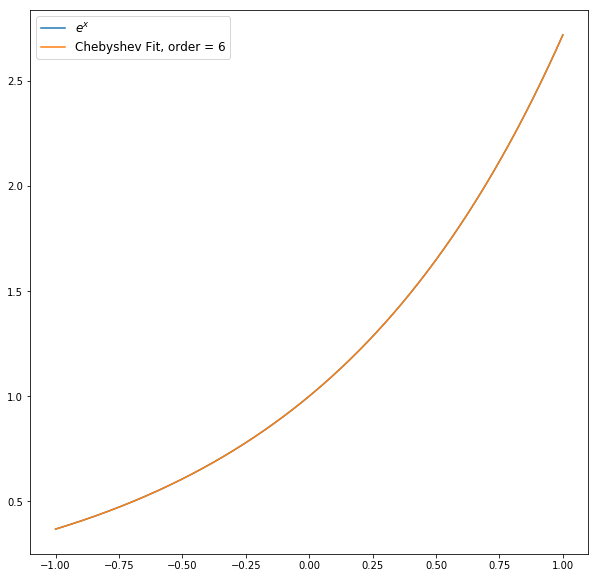

In [62]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$')
plt.plot(x,fit_ord_6,label='Chebyshev Fit, order = %s' % (str(order)))
plt.legend(fontsize='large')
plt.show()

At the much higher 

In [63]:
order = 25
m_ord_250 = chebyshev_fit(x,y,order)

fit_ord_250 = np.zeros(n)
for i in range(order+1):
    fit_ord_250 += m_ord_250[i]*np.cos(i*np.arccos(x))
    
fit_ord_250_cut = np.zeros(n)
for i in range(7):
    fit_ord_250_cut += m_ord_250[i]*np.cos(i*np.arccos(x))

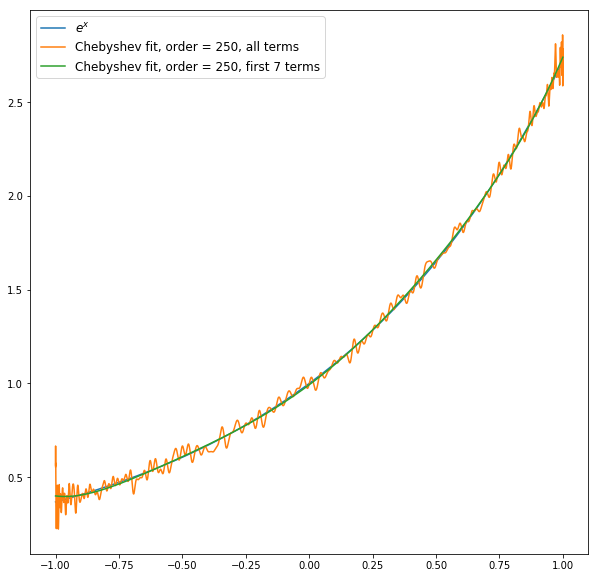

In [26]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,label='$e^x$')
plt.plot(x,fit_ord_250,label='Chebyshev fit, order = %s, all terms' % (str(order)))
plt.plot(x,fit_ord_250_cut,label='Chebyshev fit, order = %s, first 7 terms' % (str(order)))
plt.legend(fontsize='large')
plt.show()

In [13]:
RMS_err_full = np.std(fit_ord_250 - data)
max_err_full = (fit_ord_250 - data).max()
RMS_err_cut = np.std(fit_ord_250_cut - data)
max_err_cut = (fit_ord_250_cut - data).max()

In [14]:
RMS_err_full

0.20016730535887928

In [15]:
RMS_err_cut

0.20302808864889

In [16]:
max_err_full

0.6905616353435957

In [17]:
max_err_cut

0.6900012461703589

# Problem 3

### Problem Statement:

Use the fact that introducing a rotation applied to both the data and the noise leaves $\chi^2$ unchanged, generate realizations of random noise with correlations in them. 

### Strategy:

Perform Eigendecomposition on the correlation matrix $C$, ie:

$$C = V\Lambda V^T$$

where $V$ is a matrix with the eigenvectors of $C$ as columns and $\Lambda$ is a matrix with the eigenvalues of $C$ on the diagonals and 0 elsewhere.

$$\chi^2 = (d_i - m_i)^T N^{-1} (d_i - m_i)$$

If our data is JUST NOISE: becomes just the noise of the i'th data point:

$$ \chi^2 = n_i ^T N^{-1} n_i $$

for correlated noise, $N$ is some general matrix. Want to rotate this into a diagonal matrix. Can use e-val decomp

$$ \chi^2 = n_i^T (V\Lambda V^T)^{-1} n_i$$

$$ \chi^2 = n_i^T (V^{T^{-1}} \Lambda^{-1} V^{-1}) $$

but $V^{-1} = V^T$:

$$ \chi^2 = n_i^T V \Lambda^{-1} V^T n_i $$

let $\tilde{n} = V^T n$

$$ \tilde{n_i}^T \Lambda^{-1} \tilde{n_i} $$

$\tilde{n_i} = \sqrt{eval_i}$ because eigenvalues are the standard deviations 

Want to get $n$ back from $\tilde{n}$ because we want correlated noise: $n = V\tilde{n}$ 

In [18]:
n = 1000

In [32]:
N = np.ones([n,n]) + np.eye(len(N))

In [34]:
e_vals,e_vecs = np.linalg.eig(N)

In [21]:
V = e_vecs
col,row = np.diag_indices(N.shape[0])
lam = np.zeros([n,n])
lam[col,row] = e_vals

## Question 4

Want to find error bar on amplitude

$$var(m) = <m m^T> = (A^T N^{-1} A)^{-1}$$

for some external reason we knew $N$ so:

$$\sigma_m = \sqrt{(A^T N^{-1} A)^{-1}}$$